In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pylab as pl

In [ ]:
d1 = pd.read_csv('/content/financial_risk_assessment.csv')
d2 = pd.read_csv('/content/delhivery.csv')
d3 = pd.read_csv('/content/KAG_energydata_complete.csv')



---

# A

In [ ]:
d1.head()

,Age,Gender,Education Level,Marital Status,Income,Credit Score,Loan Amount,Loan Purpose,Employment Status,Years at Current Job,Payment History,Debt-to-Income Ratio,Assets Value,Number of Dependents,City,State,Country,Previous Defaults,Marital Status Change,Risk Rating
0,49,Male,PhD,Divorced,72799.0,688.0,45713.0,Business,Unemployed,19,Poor,0.154313,120228.0,0.0,Port Elizabeth,AS,Cyprus,2.0,2,Low
1,57,Female,Bachelor's,Widowed,NaN,690.0,33835.0,Auto,Employed,6,Fair,0.148920,55849.0,0.0,North Catherine,OH,Turkmenistan,3.0,2,Medium
2,21,Non-binary,Master's,Single,55687.0,600.0,36623.0,Home,Employed,8,Fair,0.362398,180700.0,3.0,South Scott,OK,Luxembourg,3.0,2,Medium
3,59,Male,Bachelor's,Single,26508.0,622.0,26541.0,Personal,Unemployed,2,Excellent,0.454964,157319.0,3.0,Robinhaven,PR,Uganda,4.0,2,Medium
4,25,Non-binary,Bachelor's,Widowed,49427.0,766.0,36528.0,Personal,Unemployed,10,Fair,0.143242,287140.0,NaN,New Heather,IL,Namibia,3.0,1,Low


In [ ]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    15000 non-null  int64  
 1   Gender                 15000 non-null  object 
 2   Education Level        15000 non-null  object 
 3   Marital Status         15000 non-null  object 
 4   Income                 12750 non-null  float64
 5   Credit Score           12750 non-null  float64
 6   Loan Amount            12750 non-null  float64
 7   Loan Purpose           15000 non-null  object 
 8   Employment Status      15000 non-null  object 
 9   Years at Current Job   15000 non-null  int64  
 10  Payment History        15000 non-null  object 
 11  Debt-to-Income Ratio   15000 non-null  float64
 12  Assets Value           12750 non-null  float64
 13  Number of Dependents   12750 non-null  float64
 14  City                   15000 non-null  object 
 15  St

In [ ]:
kolom_numerik1 = d1.select_dtypes(include=['number'])
kolom_kategorikal1 = d1.select_dtypes(include=['object'])

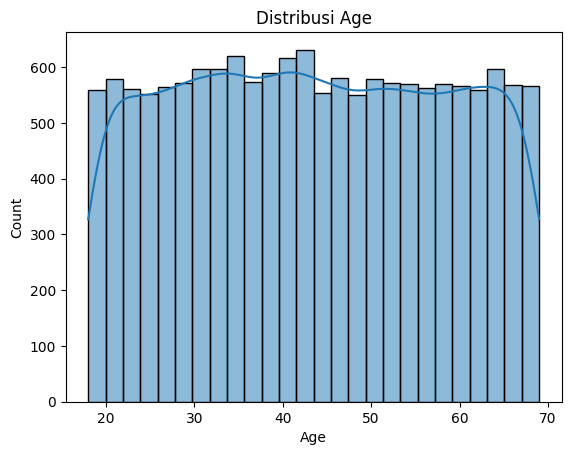

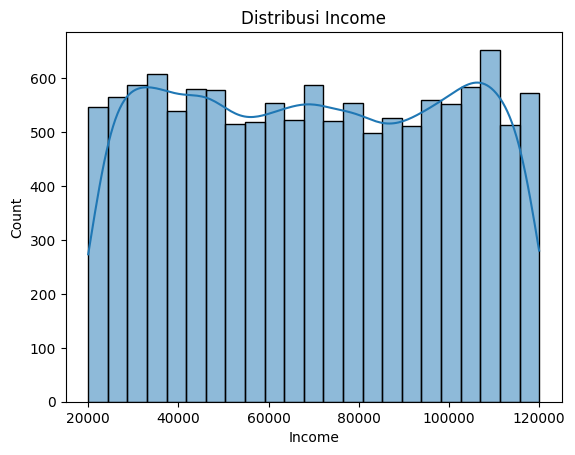

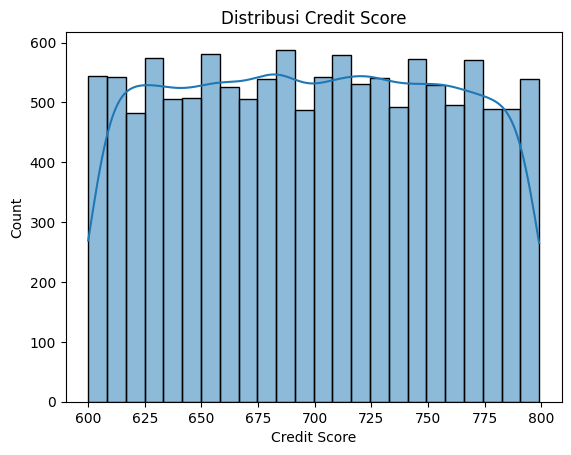

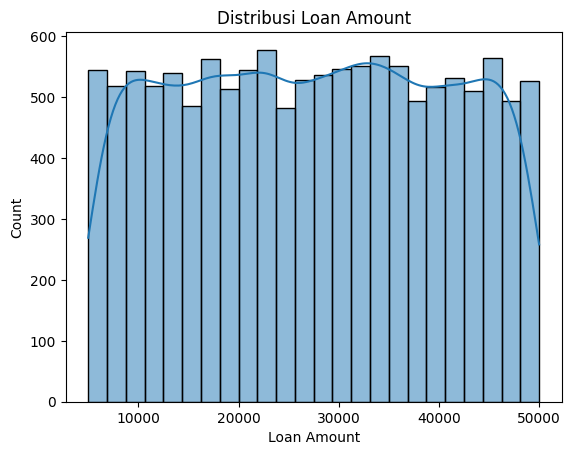

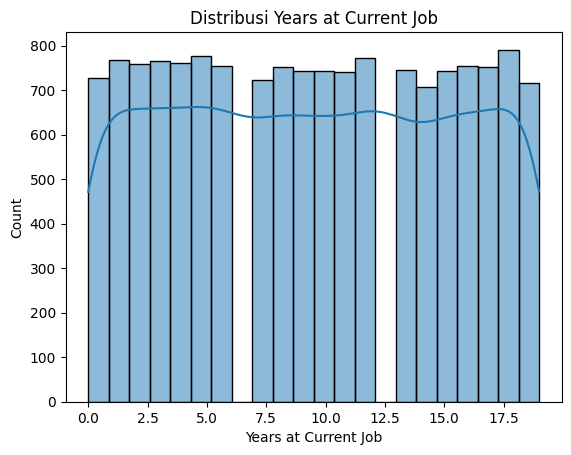

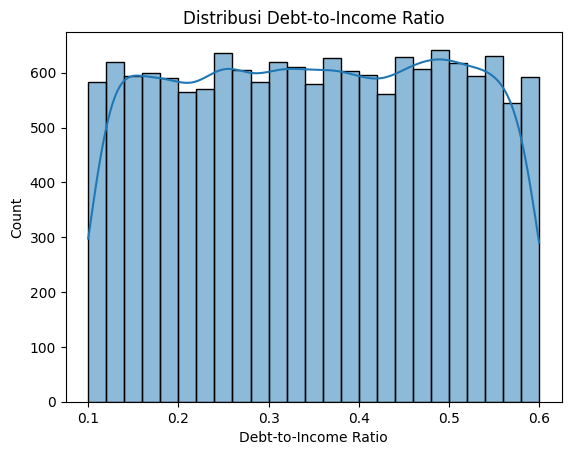

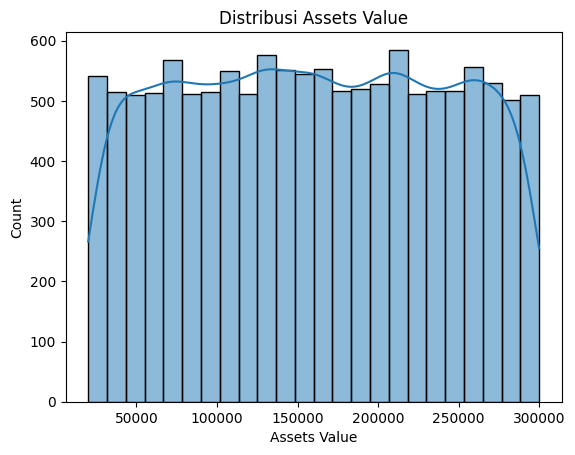

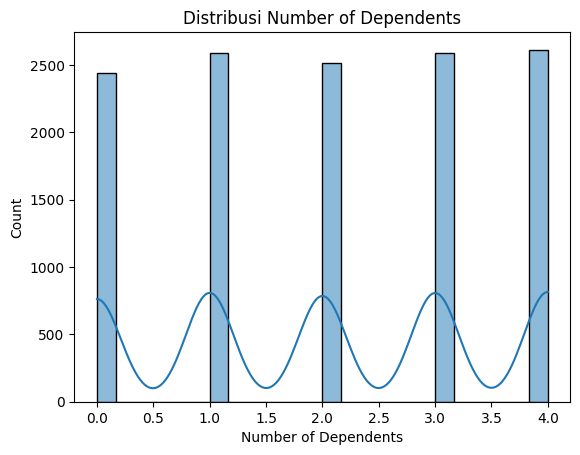

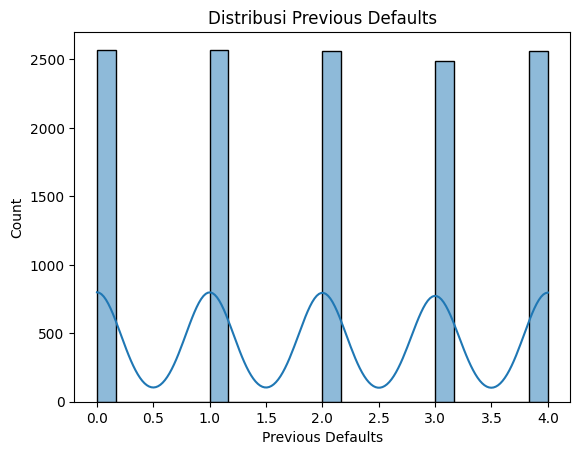

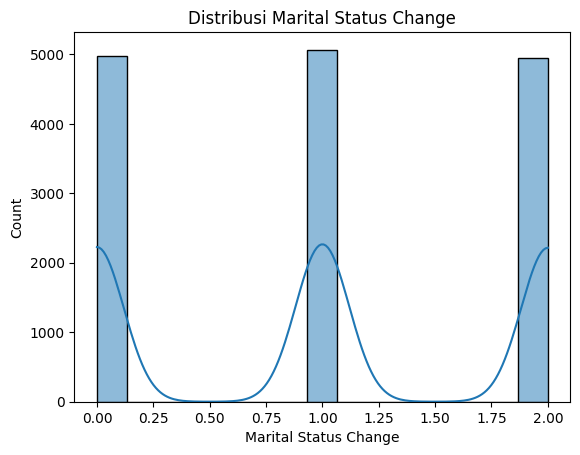

In [ ]:
# Histogram untuk variabel numerik
for col in kolom_numerik1:
    sns.histplot(data=d1, x=col, kde=True)
    plt.title(f'Distribusi {col}')
    plt.show()

Melakukan pengecekan distribusi untuk setiap variabel numerik, tidak terdapat distribusi samping sehingga tidak perlu dilakukan normalisasi

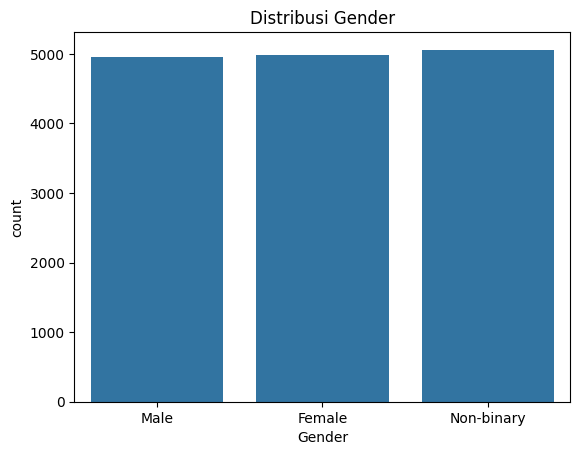

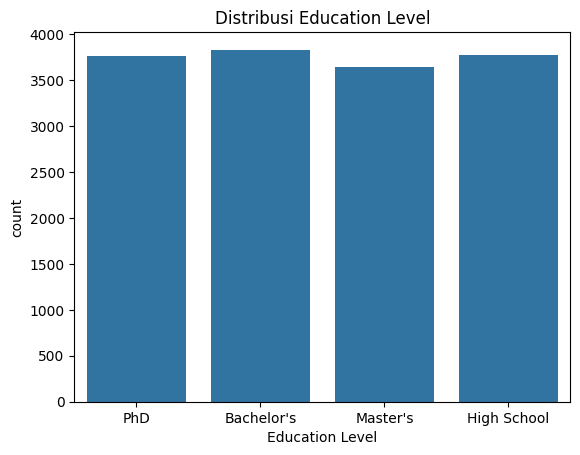

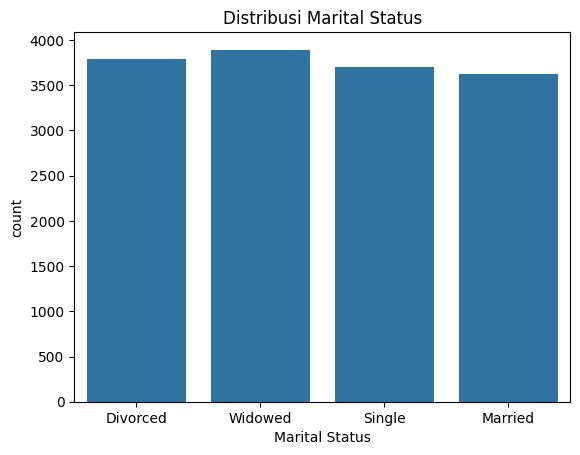

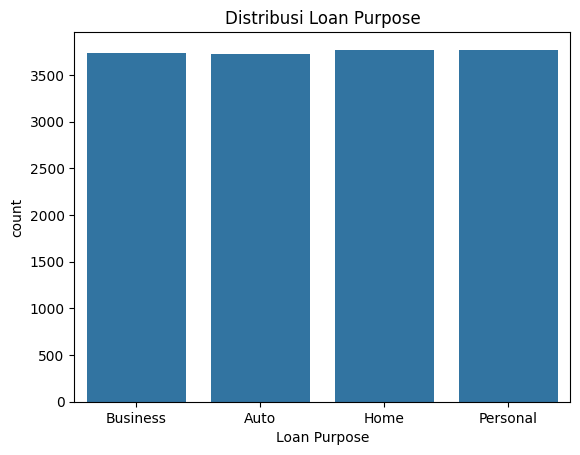

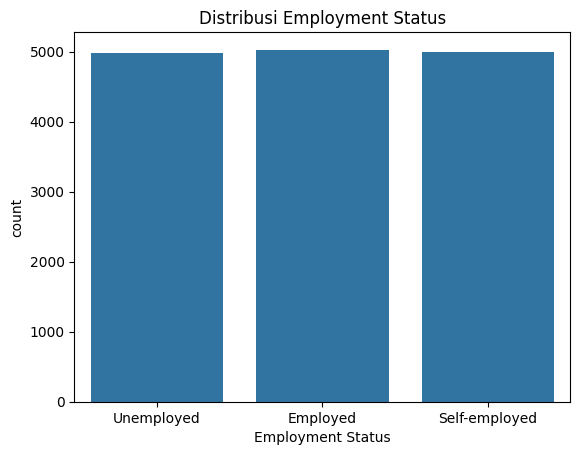

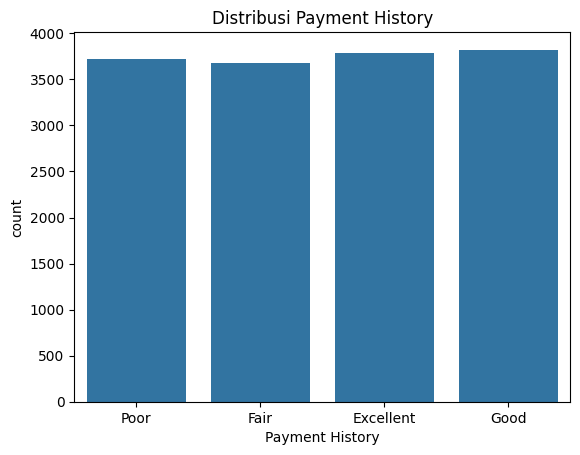

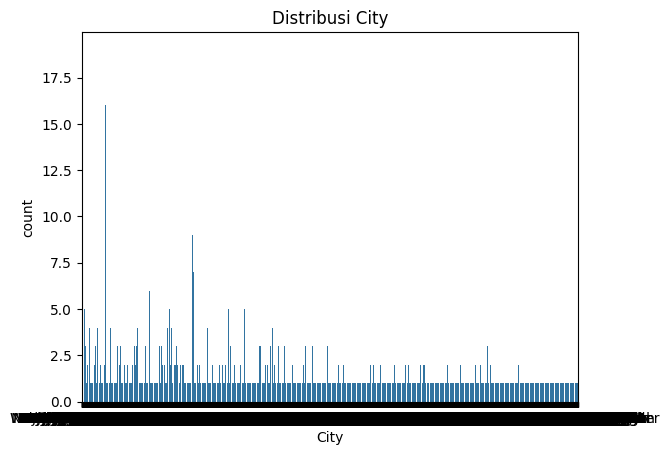

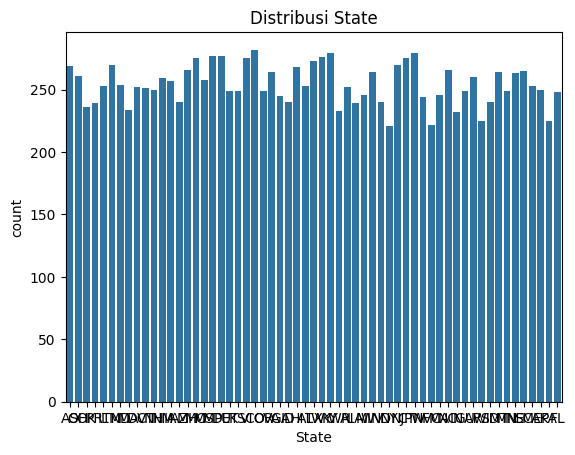

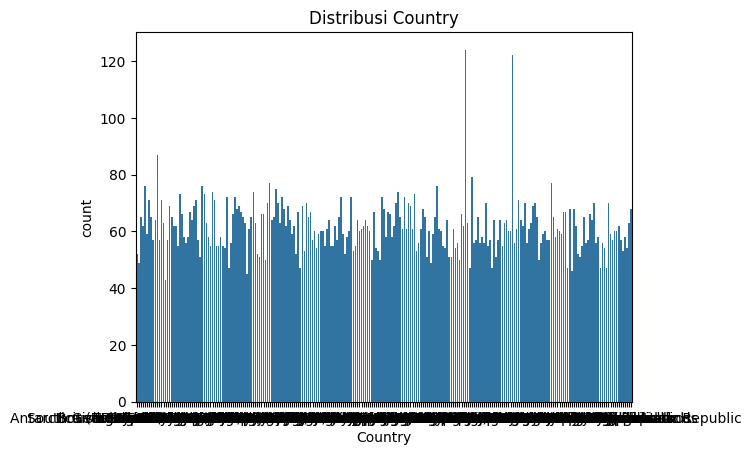

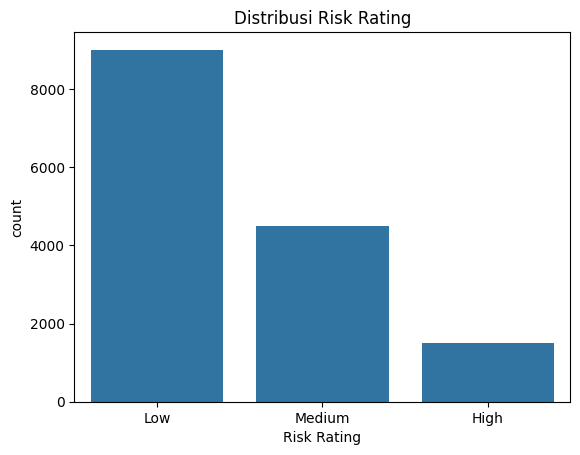

In [ ]:
for col in kolom_kategorikal1:
    sns.countplot(data=d1, x=col)
    plt.title(f'Distribusi {col}')
    plt.show()

Menampilkan keseluruhan distribusi katogrikal kolom, pada kolom city terdapat nilai yang sangat tinggi di antara bar, dan juga risk rating pada dataset ini memiliki sifat Low Risk rating

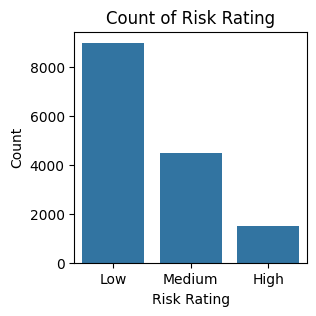

In [ ]:
plt.figure(figsize=(3,3))
sns.countplot(x='Risk Rating', data=d1, order=d1['Risk Rating'].value_counts().index)
plt.title('Count of Risk Rating')
plt.xlabel('Risk Rating')
plt.ylabel('Count')
plt.show()

In [ ]:
# Kelompokkan data berdasarkan kota dan hitung jumlah kemunculan
city_counts = d1['City'].value_counts()

# Ambil 3 kota teratas
top_3_cities = city_counts.head(3)

print(top_3_cities)

City
East Michael    19
Lake Michael    16
Port Michael    16
Name: count, dtype: int64


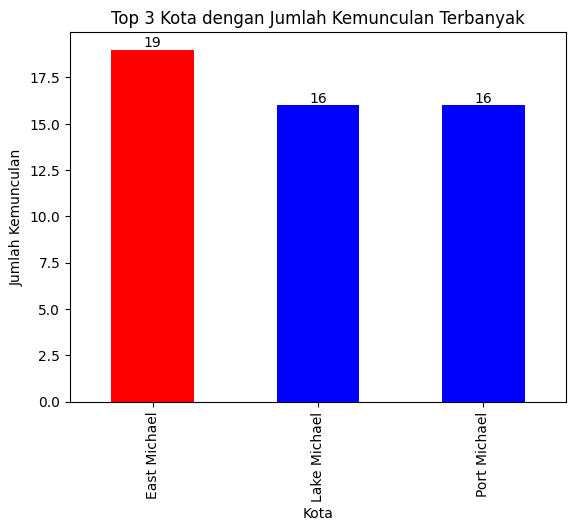

In [ ]:
colors = ['blue'] * len(top_3_cities)
colors[0] = 'red'  # Warna merah untuk kota dengan jumlah terbanyak

for i, v in enumerate(top_3_cities):
    plt.text(i, v, str(v), ha='center', va='bottom')

top_3_cities.plot(kind='bar', color=colors)
plt.title('Top 3 Kota dengan Jumlah Kemunculan Terbanyak')
plt.xlabel('Kota')
plt.ylabel('Jumlah Kemunculan')
plt.show()

Setelah mendapatkan insight pola dari hasil visualisasi kolom numerik dan juga kategorikal, saya melakukan pengecekan untuk variabel City, kota apa yang memiliki count paling tinggi. ditemukan bahwa Kota East Michael merupakan Top 1 kota di dalam dataset.

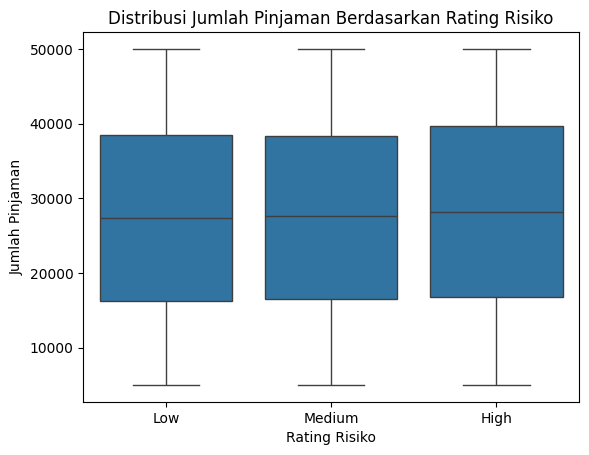

In [ ]:
sns.boxplot(x='Risk Rating', y='Loan Amount', data=d1)
plt.title('Distribusi Jumlah Pinjaman Berdasarkan Rating Risiko')
plt.xlabel('Rating Risiko')
plt.ylabel('Jumlah Pinjaman')
plt.show()

<ipython-input-35-e8456aa46862>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Risk Rating', y='Loan Amount', data=d1, palette=[color_from_value(x) for x in mean_loan])


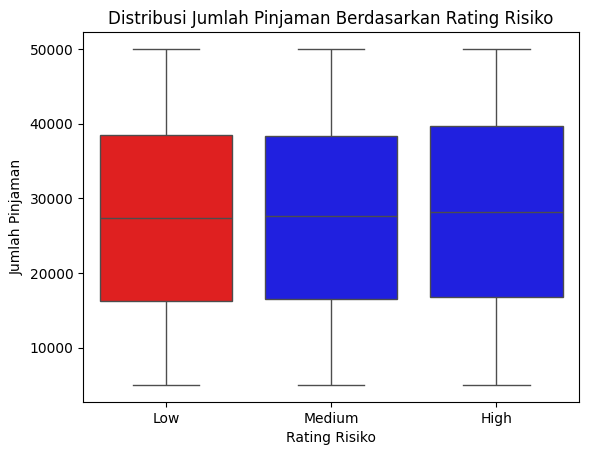

In [ ]:
# Hitung rata-rata jumlah pinjaman untuk setiap kategori risiko
mean_loan = d1.groupby('Risk Rating')['Loan Amount'].mean()

# Fungsi untuk menentukan warna berdasarkan nilai rata-rata
def color_from_value(val):
    if val > mean_loan.mean():
        return "red"  # Warna merah untuk rata-rata lebih tinggi
    else:
        return "blue"  # Warna biru untuk rata-rata lebih rendah

# Buat box plot dengan warna yang disesuaikan
sns.boxplot(x='Risk Rating', y='Loan Amount', data=d1, palette=[color_from_value(x) for x in mean_loan])

# Tambahkan judul dan label sumbu
plt.title('Distribusi Jumlah Pinjaman Berdasarkan Rating Risiko')
plt.xlabel('Rating Risiko')
plt.ylabel('Jumlah Pinjaman')

plt.show()

Hubungan antara variabel numerik loan amount dan juga rating resiko

pada visualisasi kita dapat melihat boxplot persebaran antar kedua variabel tersebut, dan insight yang di dapatkan walaupun sangat seditkit perbedaannya namun jumlah peminjaman lebih tinggi memiliki tingkat risk sedikit lebih rendah berdasarkan hasil box plot

In [ ]:
grouped11 = d1.groupby('Risk Rating')[['Age', 'Loan Amount']].mean()

print(grouped11)

                   Age   Loan Amount
Risk Rating                         
High         43.642667  27989.384373
Low          43.550444  27360.082798
Medium       43.193778  27450.799221


In [ ]:
grouped12 = d1.groupby('Risk Rating')[['Age', 'Loan Amount']].mean()
print(grouped12)

                   Age   Loan Amount
Risk Rating                         
High         43.642667  27989.384373
Low          43.550444  27360.082798
Medium       43.193778  27450.799221


In [ ]:
# Melihat hubungan antara Age Loan Amount dan City
grouped13 = d1.groupby('Risk Rating').agg({
    'Age': 'mean',
    'Loan Amount': 'sum',  # Jumlah loan amount
    'City': 'count' # Jumlah City
})
print(grouped13)

                   Age  Loan Amount  City
Risk Rating                              
High         43.642667   35462550.0  1500
Low          43.550444  208839512.0  9000
Medium       43.193778  105685577.0  4500


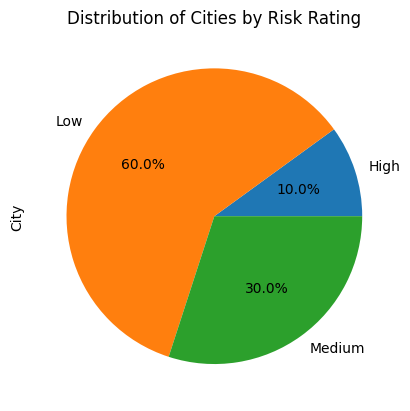

In [ ]:
grouped13['City'].plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Cities by Risk Rating')
plt.show()

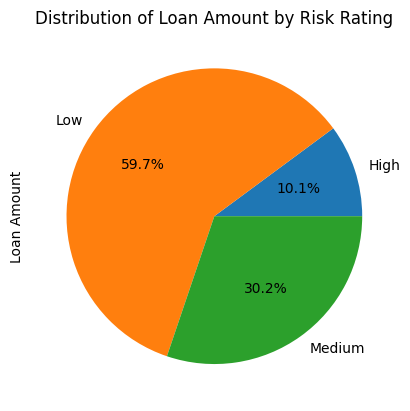

In [ ]:
grouped13['Loan Amount'].plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Loan Amount by Risk Rating')
plt.show()

In [ ]:
d1['City'].nunique()

10614

In [ ]:
d1.columns

Index(['Age', 'Gender', 'Education Level', 'Marital Status', 'Income',
       'Credit Score', 'Loan Amount', 'Loan Purpose', 'Employment Status',
       'Years at Current Job', 'Payment History', 'Debt-to-Income Ratio',
       'Assets Value', 'Number of Dependents', 'City', 'State', 'Country',
       'Previous Defaults', 'Marital Status Change', 'Risk Rating'],
      dtype='object')

In [ ]:
'''
# Calculate average income by marital status
average_income_by_marital_status = d1.groupby('Marital Status')['Income'].mean()

# Sort by income (descending) to identify the highest
average_income_by_marital_status = average_income_by_marital_status.sort_values(ascending=False)

# Emphasize the highest bar with a different color and saturation
highest_income_marital_status = average_income_by_marital_status.index[0]  # Get the marital status with highest income
highest_income_value = average_income_by_marital_status.iloc[0]  # Get the highest income value

custom_palette = ['#3498db'] * len(average_income_by_marital_status)  # Base palette
custom_palette[0] = '#ff9933'  # Set a brighter color for the highest income

sns.barplot(x=average_income_by_marital_status.index,
            y=average_income_by_marital_status.values,
            palette=custom_palette)

plt.xlabel('Marital Status')
plt.ylabel('Average Income')
plt.title('Average Income by Marital Status (Highest Highlighted)')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

# Add a horizontal line at the highest income value
plt.axhline(y=highest_income_value, color='gray', linestyle='--', linewidth=0.5)

plt.text(highest_income_marital_status, highest_income_value * 0.9,  # Adjust vertical position
         f"{highest_income_value:.0f}",  # Format as integer
         ha='center', va='bottom', fontsize=12, weight='bold', color='black')  # Align and format text

plt.show()
'''

'\n# Calculate average income by marital status\naverage_income_by_marital_status = d1.groupby(\'Marital Status\')[\'Income\'].mean()\n\n# Sort by income (descending) to identify the highest\naverage_income_by_marital_status = average_income_by_marital_status.sort_values(ascending=False)\n\n# Emphasize the highest bar with a different color and saturation\nhighest_income_marital_status = average_income_by_marital_status.index[0]  # Get the marital status with highest income\nhighest_income_value = average_income_by_marital_status.iloc[0]  # Get the highest income value\n\ncustom_palette = [\'#3498db\'] * len(average_income_by_marital_status)  # Base palette\ncustom_palette[0] = \'#ff9933\'  # Set a brighter color for the highest income\n\nsns.barplot(x=average_income_by_marital_status.index,\n            y=average_income_by_marital_status.values,\n            palette=custom_palette)\n\nplt.xlabel(\'Marital Status\')\nplt.ylabel(\'Average Income\')\nplt.title(\'Average Income by Marital



---

# B

In [ ]:
d2.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [ ]:
d2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [ ]:
kolom_numerik2 = d2.select_dtypes(include=['number'])
kolom_kategorikal2 = d2.select_dtypes(include=['object'])

In [ ]:
d2['trip_creation_time']=pd.to_datetime(d2['trip_creation_time'])
d2['od_start_time']=pd.to_datetime(d2['od_start_time'])
d2['od_end_time']=pd.to_datetime(d2['od_end_time'])

In [ ]:
d2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144867 non-null  object        
 1   trip_creation_time              144867 non-null  datetime64[ns]
 2   route_schedule_uuid             144867 non-null  object        
 3   route_type                      144867 non-null  object        
 4   trip_uuid                       144867 non-null  object        
 5   source_center                   144867 non-null  object        
 6   source_name                     144574 non-null  object        
 7   destination_center              144867 non-null  object        
 8   destination_name                144606 non-null  object        
 9   od_start_time                   144867 non-null  datetime64[ns]
 10  od_end_time                     144867 non-null  datetim

In [ ]:
d2.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [ ]:
print(d2.describe())

       start_scan_to_end_scan  cutoff_factor  actual_distance_to_destination  \
count           144867.000000  144867.000000                   144867.000000   
mean               961.262986     232.926567                      234.073372   
std               1037.012769     344.755577                      344.990009   
min                 20.000000       9.000000                        9.000045   
25%                161.000000      22.000000                       23.355874   
50%                449.000000      66.000000                       66.126571   
75%               1634.000000     286.000000                      286.708875   
max               7898.000000    1927.000000                     1927.447705   

         actual_time      osrm_time  osrm_distance         factor  \
count  144867.000000  144867.000000  144867.000000  144867.000000   
mean      416.927527     213.868272     284.771297       2.120107   
std       598.103621     308.011085     421.119294       1.715421   
min

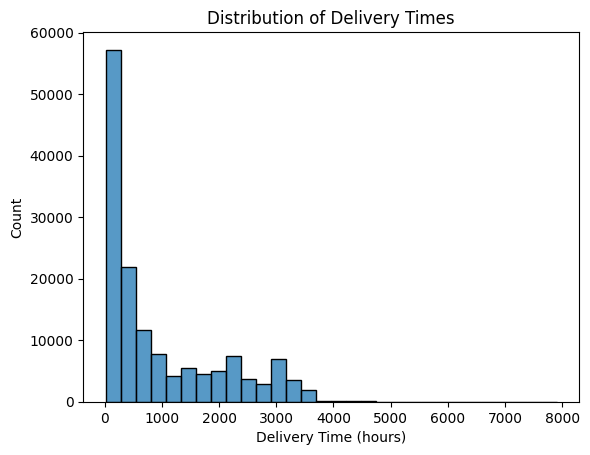

In [ ]:
sns.histplot(d2['start_scan_to_end_scan'], bins=30)
plt.xlabel('Delivery Time (hours)')
plt.title('Distribution of Delivery Times')
plt.show()

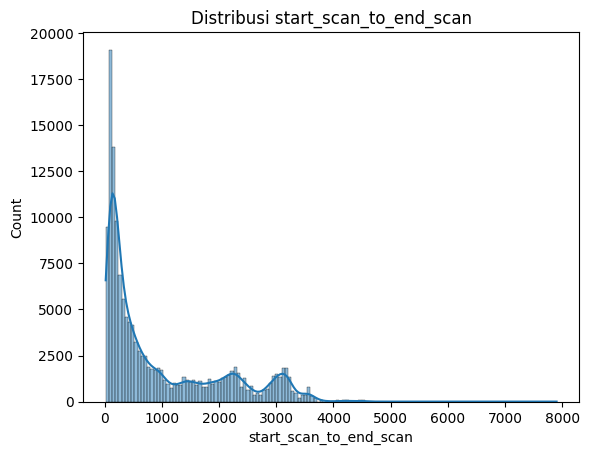

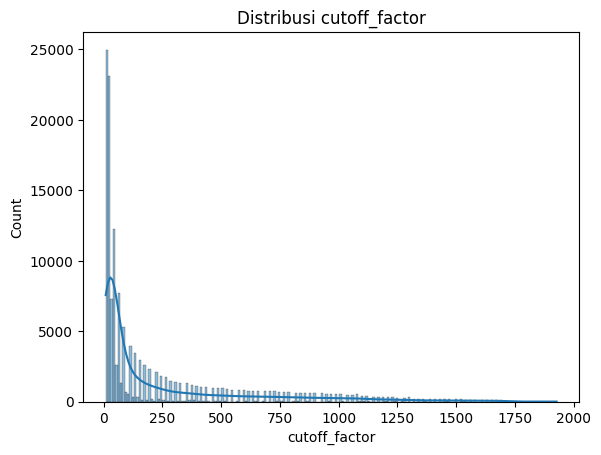

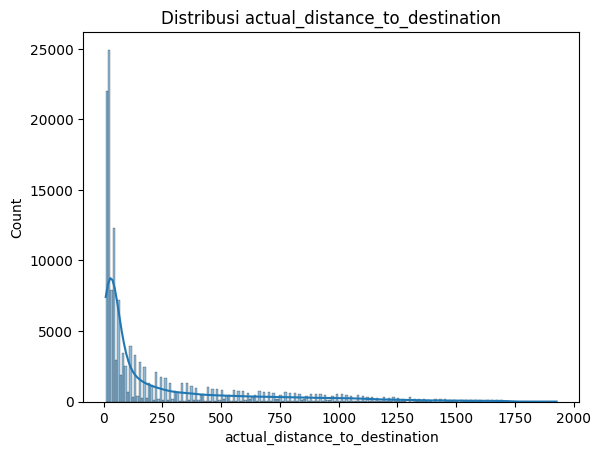

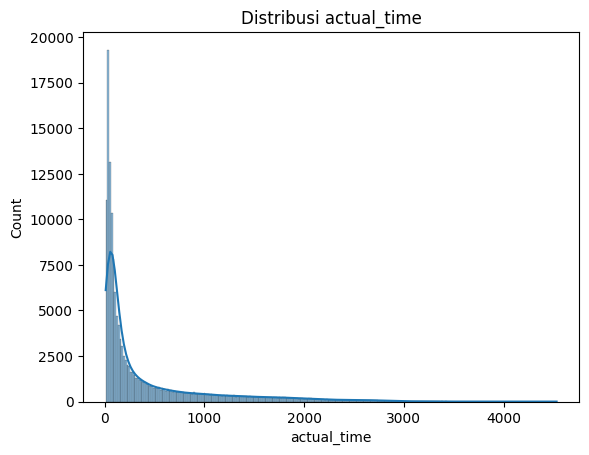

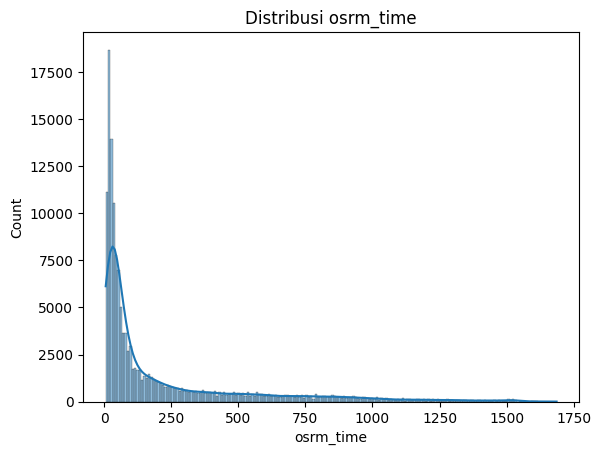

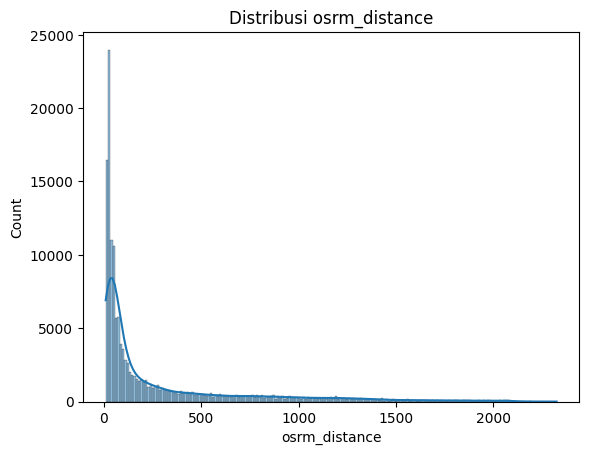

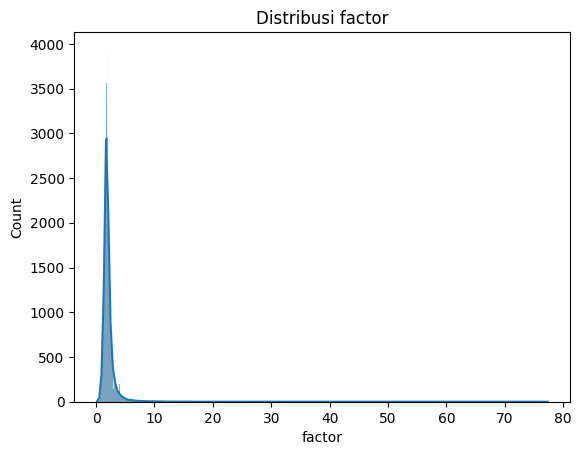

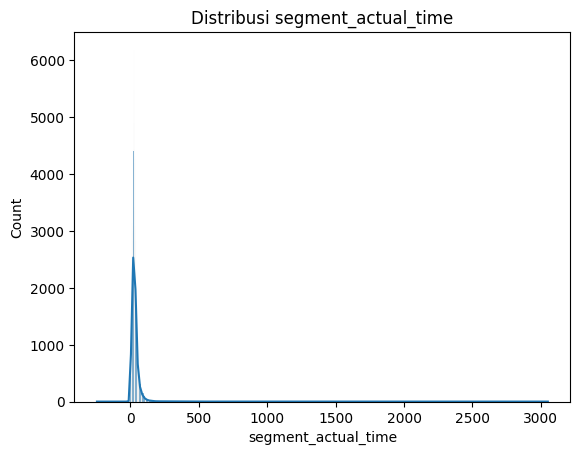

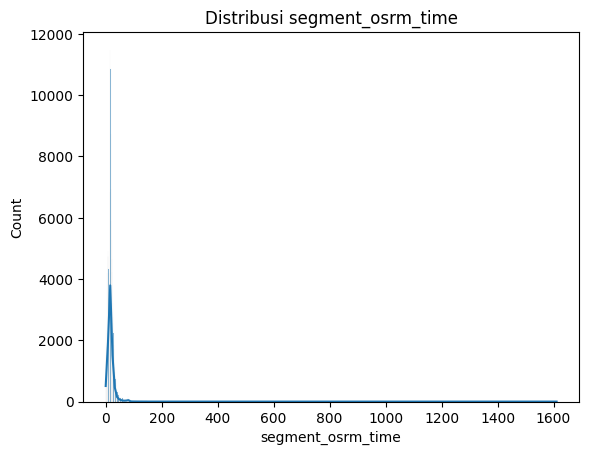

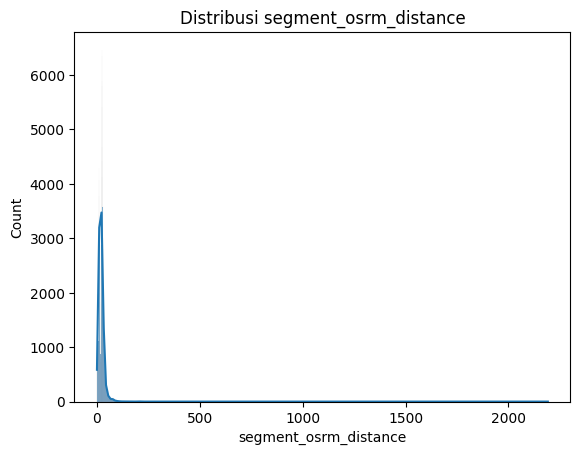

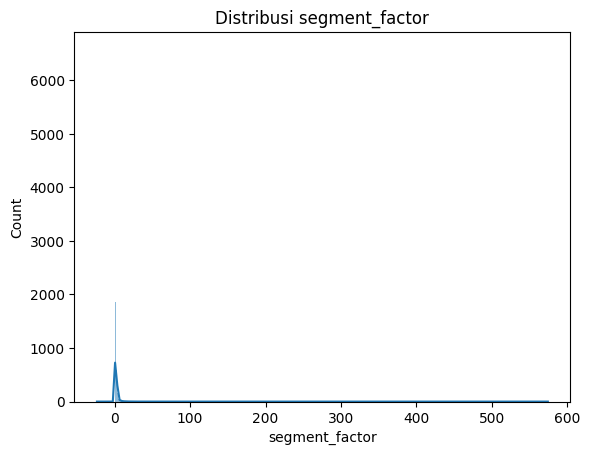

In [ ]:
for col in kolom_numerik2:
    sns.histplot(data=d2, x=col, kde=True)
    plt.title(f'Distribusi {col}')
    plt.show()

In [ ]:
d2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144867 non-null  object        
 1   trip_creation_time              144867 non-null  datetime64[ns]
 2   route_schedule_uuid             144867 non-null  object        
 3   route_type                      144867 non-null  object        
 4   trip_uuid                       144867 non-null  object        
 5   source_center                   144867 non-null  object        
 6   source_name                     144574 non-null  object        
 7   destination_center              144867 non-null  object        
 8   destination_name                144606 non-null  object        
 9   od_start_time                   144867 non-null  datetime64[ns]
 10  od_end_time                     144867 non-null  datetim

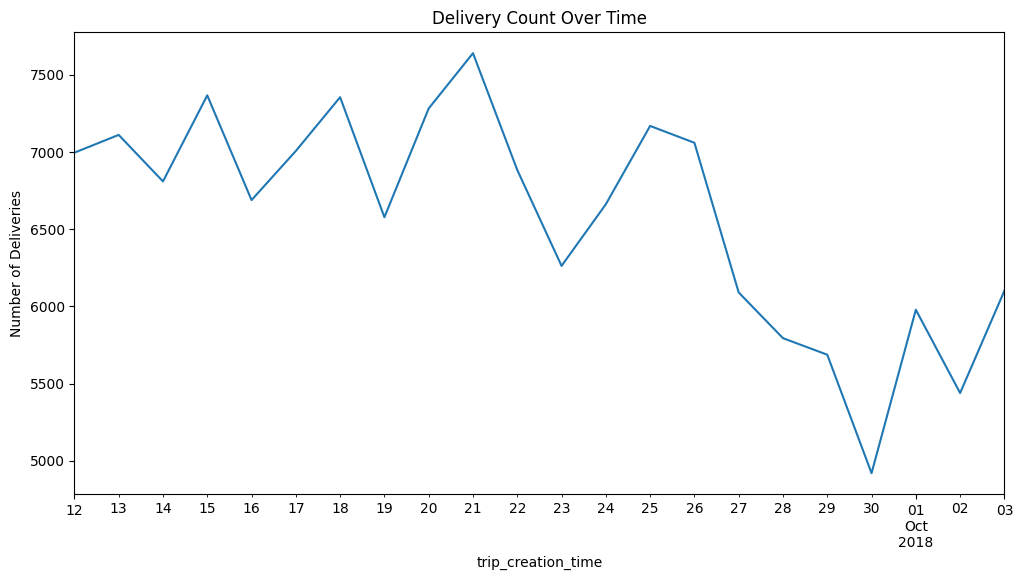

In [ ]:
# Create a time series plot of delivery count over time
d2.resample('D', on='trip_creation_time')['trip_uuid'].count().plot(figsize=(12, 6))
plt.title('Delivery Count Over Time')
plt.ylabel('Number of Deliveries')
plt.show()

<ipython-input-84-4297501bf994>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=d2, x=attrs[count], ax=axs[row, col], palette='pastel')
<ipython-input-84-4297501bf994>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=d2, x=attrs[count], ax=axs[row, col], palette='pastel')
<ipython-input-84-4297501bf994>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=d2, x=attrs[count], ax=axs[row, col], palette='pastel')
<ipython-input-84-4297501bf994>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be r

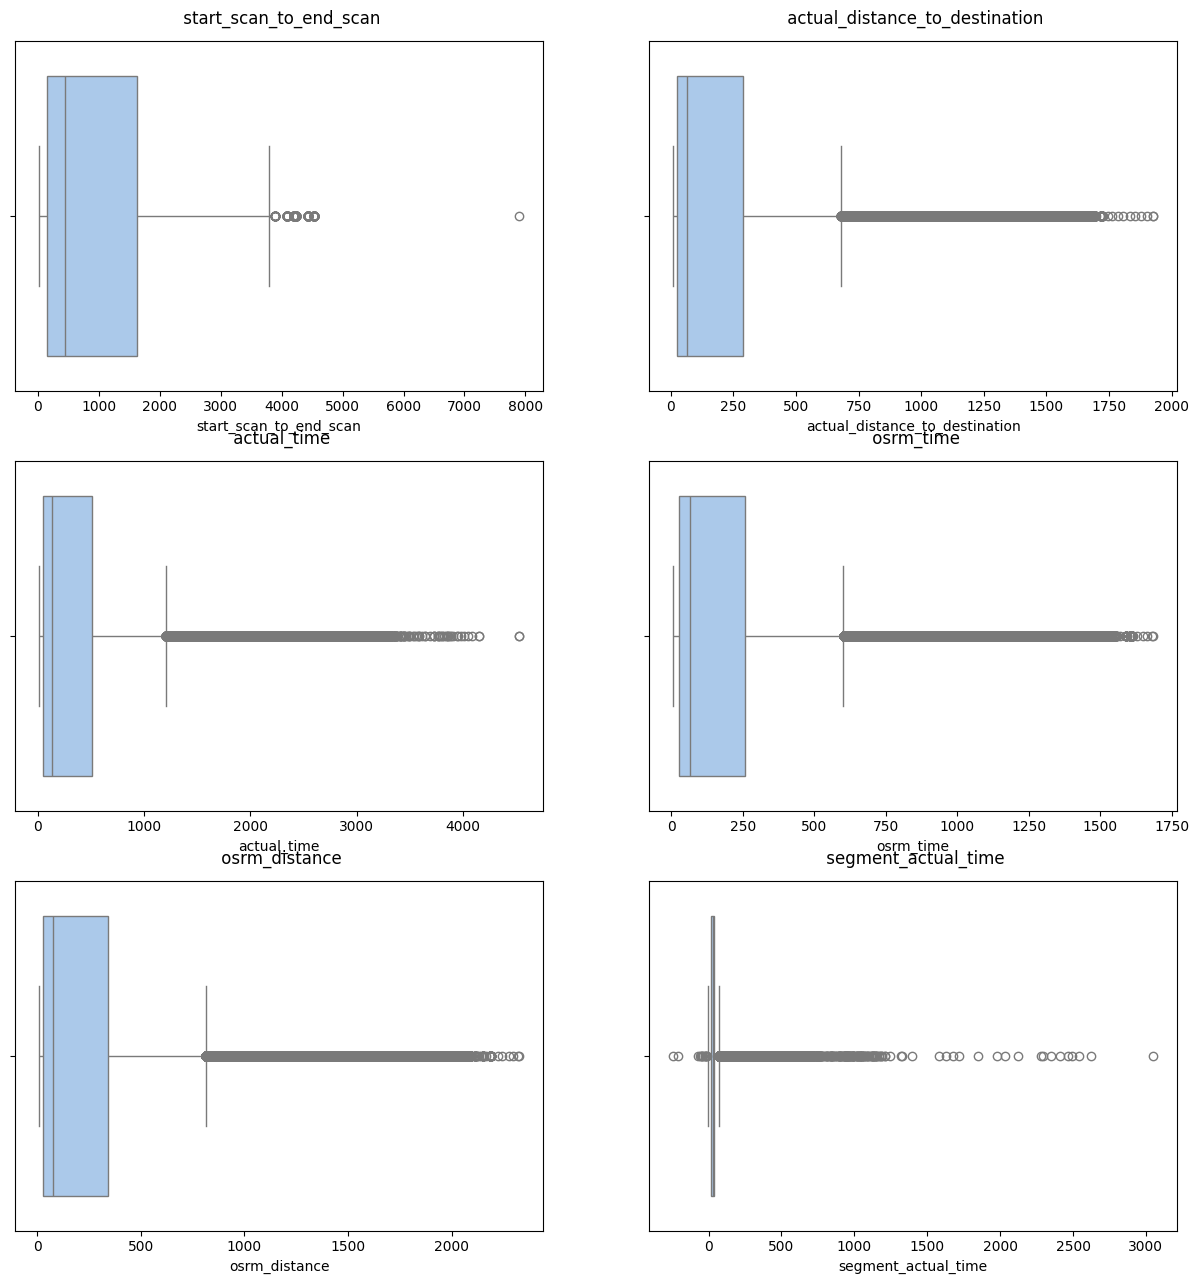

In [ ]:
attrs=['start_scan_to_end_scan','actual_distance_to_destination','actual_time','osrm_time',
       'osrm_distance','segment_actual_time','segment_osrm_time','segment_osrm_distance']
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))
fig.subplots_adjust(top=1.3)
count = 0
for row in range(3):
    for col in range(2):
        sns.boxplot(data=d2, x=attrs[count], ax=axs[row, col], palette='pastel')
        axs[row,col].set_title(f" {attrs[count]}", pad=12, fontsize=12)
        count += 1
plt.show()

Terdapat banyak outlier di dalam data, sehingga dalam proses setelah EDA awal ini perlu dilakukan preprocessing lebih lanjut lagi

In [ ]:
d22 = d2

In [ ]:
d22['trip_creation_year'] =d22['trip_creation_time'].dt.year
d22['trip_creation_month'] =d22['trip_creation_time'].dt.month_name()
d22['trip_creation_day'] =d22['trip_creation_time'].dt.day

<Axes: xlabel='trip_creation_month', ylabel='count'>

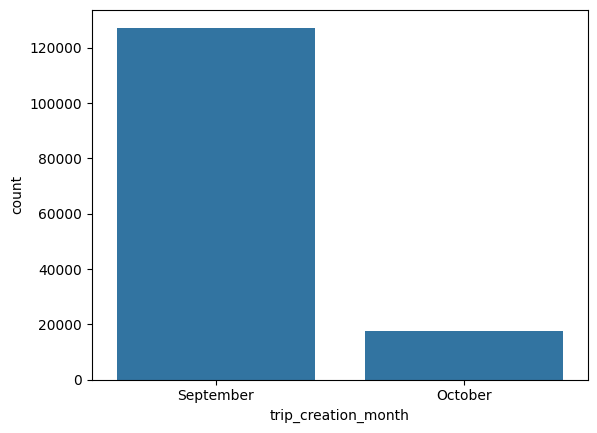

In [ ]:
sns.countplot(x='trip_creation_month',data=d22)

Datanya kebanyak muncul di bulan September dan sedikit muncul di bulan Oktober

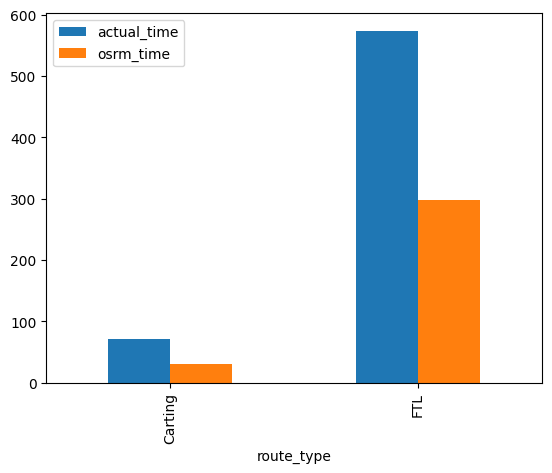

In [ ]:
d2.groupby('route_type').aggregate({'actual_time':'mean','osrm_time':'mean'}).plot(kind='bar')
plt.show()

Di sini kita dapat melihat bahwa rute FTL memerlukan waktu yang lebih lama dibandingkan rute lainnya untuk melakukan proses shipping

In [ ]:
d2['weekday'] = d2['trip_creation_time'].dt.day_name()
d2.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,trip_creation_year,trip_creation_month,trip_creation_day,weekday
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,11.9653,1.272727,14.0,11.0,11.9653,1.272727,2018,September,20,Thursday
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,21.7243,1.200000,10.0,9.0,9.7590,1.111111,2018,September,20,Thursday
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,32.5395,1.428571,16.0,7.0,10.8152,2.285714,2018,September,20,Thursday
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,45.5620,1.550000,21.0,12.0,13.0224,1.750000,2018,September,20,Thursday
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,54.2181,1.545455,6.0,5.0,3.9153,1.200000,2018,September,20,Thursday


In [ ]:
day=d2['weekday'].value_counts().to_frame('count').reset_index()
day

,weekday,count
0,Wednesday,26732
1,Thursday,20481
2,Friday,20242
3,Tuesday,19961
4,Saturday,19936
5,Monday,19645
6,Sunday,17870


[]

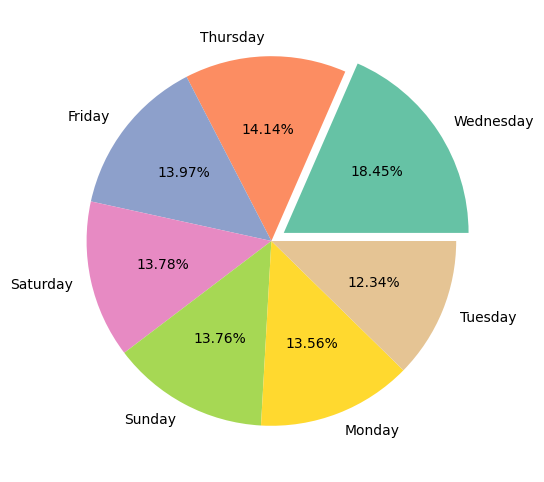

In [ ]:
plt.figure(figsize=(8,6))
palette_color = sns.color_palette('Set2')
plt.pie(data=day, x=day['count'], colors=palette_color, labels=['Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday','Tuesday'], explode=(0.08,0,0,0,0,0,0), autopct='%0.2f%%')
plt.plot()

Pengiriman biasanya dilakukan pada hari Rabu sebesar 18.45 persen

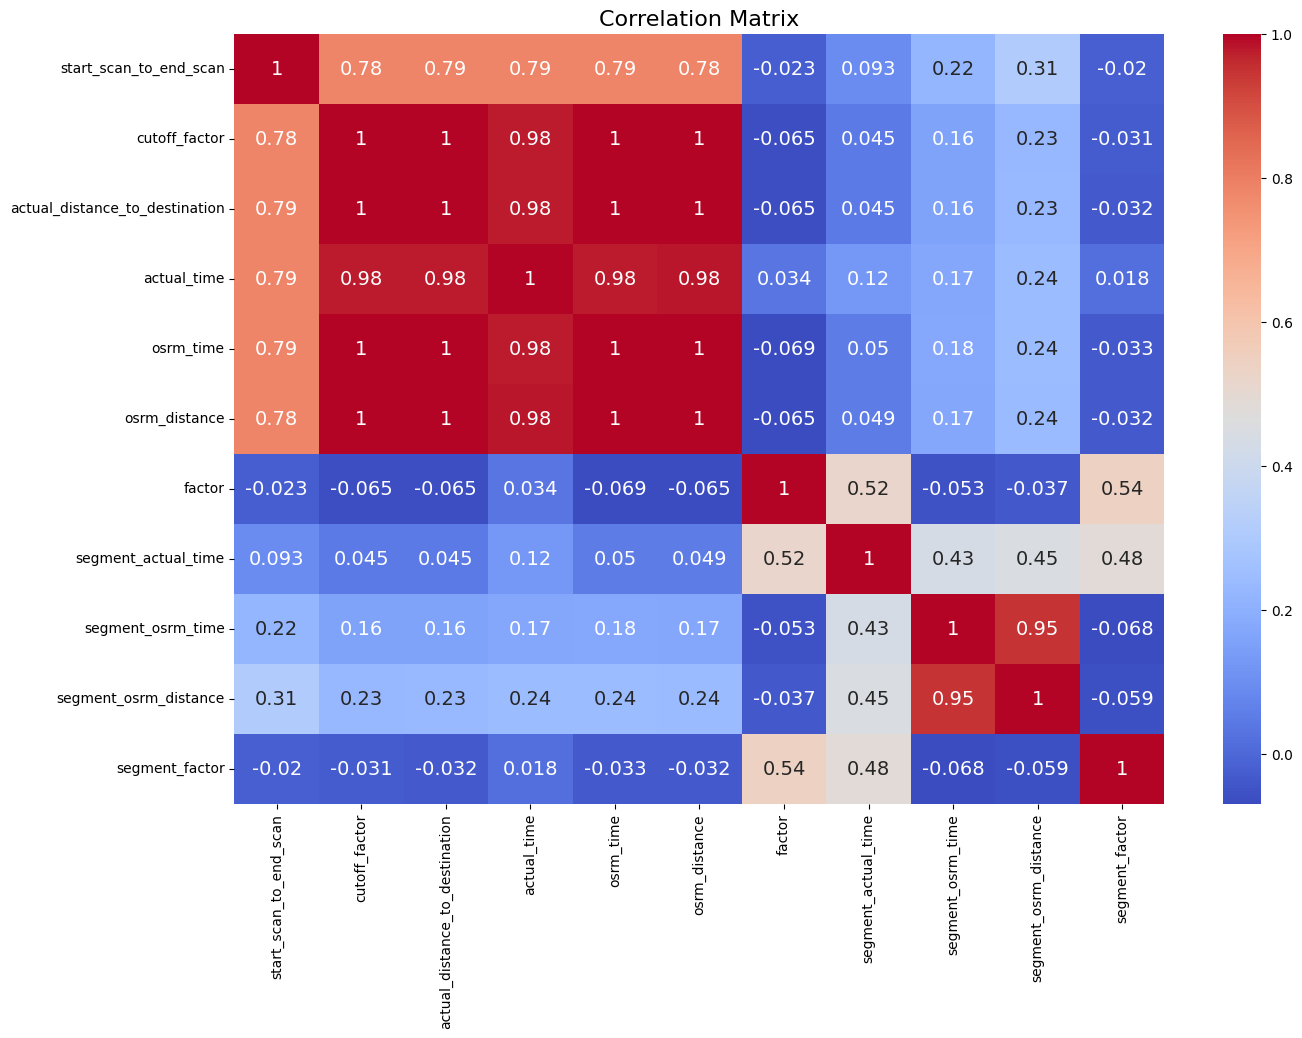

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(kolom_numerik2.corr(), annot=True, cmap='coolwarm',
            annot_kws={'fontsize': 14},
            xticklabels=kolom_numerik2.columns, yticklabels=kolom_numerik2.columns,
            facecolor='white')
plt.title('Correlation Matrix', fontsize=16)
plt.show()



---

# C

In [ ]:
# C
d3.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [ ]:
d3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [ ]:
kolom_numerik3 = d3.select_dtypes(include=['number'])
kolom_kategorikal3 = d3.select_dtypes(include=['object'])

In [ ]:
d3.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [ ]:
d3['date'] = pd.to_datetime(d3['date'])

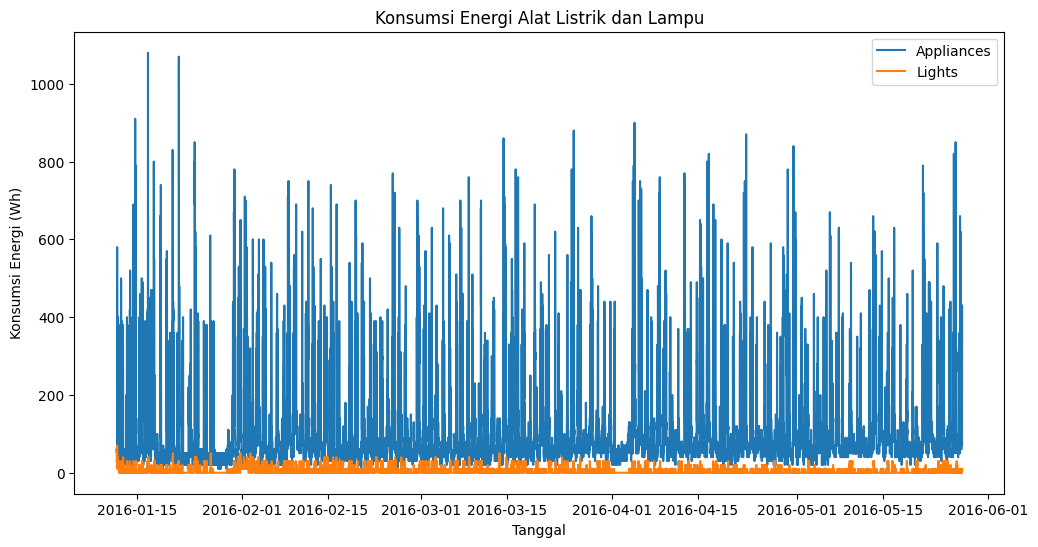

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(d3['date'], d3['Appliances'], label='Appliances')
plt.plot(d3['date'], d3['lights'], label='Lights')
plt.xlabel('Tanggal')
plt.ylabel('Konsumsi Energi (Wh)')
plt.title('Konsumsi Energi Alat Listrik dan Lampu')
plt.legend()
plt.show()

In [ ]:
# Setting date as the index:
d3.set_index('date', inplace=True)

In [ ]:
d3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19735 entries, 2016-01-11 17:00:00 to 2016-05-27 18:00:00
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19735 non-null  int64  
 1   lights       19735 non-null  int64  
 2   T1           19735 non-null  float64
 3   RH_1         19735 non-null  float64
 4   T2           19735 non-null  float64
 5   RH_2         19735 non-null  float64
 6   T3           19735 non-null  float64
 7   RH_3         19735 non-null  float64
 8   T4           19735 non-null  float64
 9   RH_4         19735 non-null  float64
 10  T5           19735 non-null  float64
 11  RH_5         19735 non-null  float64
 12  T6           19735 non-null  float64
 13  RH_6         19735 non-null  float64
 14  T7           19735 non-null  float64
 15  RH_7         19735 non-null  float64
 16  T8           19735 non-null  float64
 17  RH_8         19735 non-null  float64
 18  T9         

In [ ]:
d3['month'] = d3.index.month
d3['weekday'] = d3.index.weekday
d3['hour'] = d3.index.hour
d3['day'] = d3.index.day
d3['day_of_week'] = d3.index.dayofweek

In [ ]:
d3.tail()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,Windspeed,Visibility,Tdewpoint,rv1,rv2,month,weekday,hour,day,day_of_week
date,,,,,,,,,,,,,,,,,,,,,
2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.7,45.590000,...,3.333333,23.666667,13.333333,43.096812,43.096812,5,4,17,27,4
2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.7,45.590000,...,3.500000,24.500000,13.300000,49.282940,49.282940,5,4,17,27,4
2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.7,45.730000,...,3.666667,25.333333,13.266667,29.199117,29.199117,5,4,17,27,4
2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.7,45.790000,...,3.833333,26.166667,13.233333,6.322784,6.322784,5,4,17,27,4
2016-05-27 18:00:00,430,10,25.500000,46.600000,25.264286,42.971429,26.823333,41.156667,24.7,45.963333,...,4.000000,27.000000,13.200000,34.118851,34.118851,5,4,18,27,4


In [ ]:
d3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19735 entries, 2016-01-11 17:00:00 to 2016-05-27 18:00:00
Data columns (total 33 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19735 non-null  int64  
 1   lights       19735 non-null  int64  
 2   T1           19735 non-null  float64
 3   RH_1         19735 non-null  float64
 4   T2           19735 non-null  float64
 5   RH_2         19735 non-null  float64
 6   T3           19735 non-null  float64
 7   RH_3         19735 non-null  float64
 8   T4           19735 non-null  float64
 9   RH_4         19735 non-null  float64
 10  T5           19735 non-null  float64
 11  RH_5         19735 non-null  float64
 12  T6           19735 non-null  float64
 13  RH_6         19735 non-null  float64
 14  T7           19735 non-null  float64
 15  RH_7         19735 non-null  float64
 16  T8           19735 non-null  float64
 17  RH_8         19735 non-null  float64
 18  T9         

In [ ]:
d3['day_of_week'].nunique()

7

Text(0, 0.5, 'Energy Consumption')

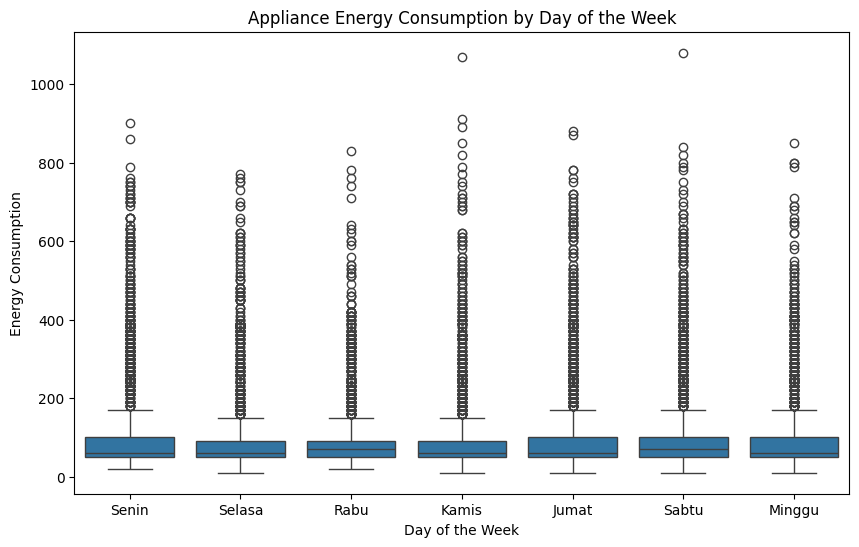

In [ ]:
# Map the day of the week values to their respective names
day_names = ['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu']
d3['day_of_week'] = d3['day_of_week'].map(lambda x: day_names[x])

# Create a box plot or violin plot to compare energy consumption across different days of the week
plt.figure(figsize=(10, 6))
sns.boxplot(x='day_of_week', y='Appliances', data=d3, order=day_names)  # or sns.violinplot()
plt.title('Appliance Energy Consumption by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Energy Consumption')

Lewat persebaran boxplot diatas kita dapat melihat bahwa hari Kamis dan juga Sabtu memiliki outliers tertinggi di bandingkan variabel lainnya

In [ ]:
d3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19735 entries, 2016-01-11 17:00:00 to 2016-05-27 18:00:00
Data columns (total 33 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19735 non-null  int64  
 1   lights       19735 non-null  int64  
 2   T1           19735 non-null  float64
 3   RH_1         19735 non-null  float64
 4   T2           19735 non-null  float64
 5   RH_2         19735 non-null  float64
 6   T3           19735 non-null  float64
 7   RH_3         19735 non-null  float64
 8   T4           19735 non-null  float64
 9   RH_4         19735 non-null  float64
 10  T5           19735 non-null  float64
 11  RH_5         19735 non-null  float64
 12  T6           19735 non-null  float64
 13  RH_6         19735 non-null  float64
 14  T7           19735 non-null  float64
 15  RH_7         19735 non-null  float64
 16  T8           19735 non-null  float64
 17  RH_8         19735 non-null  float64
 18  T9         

In [ ]:
d3['hour'].nunique()

24

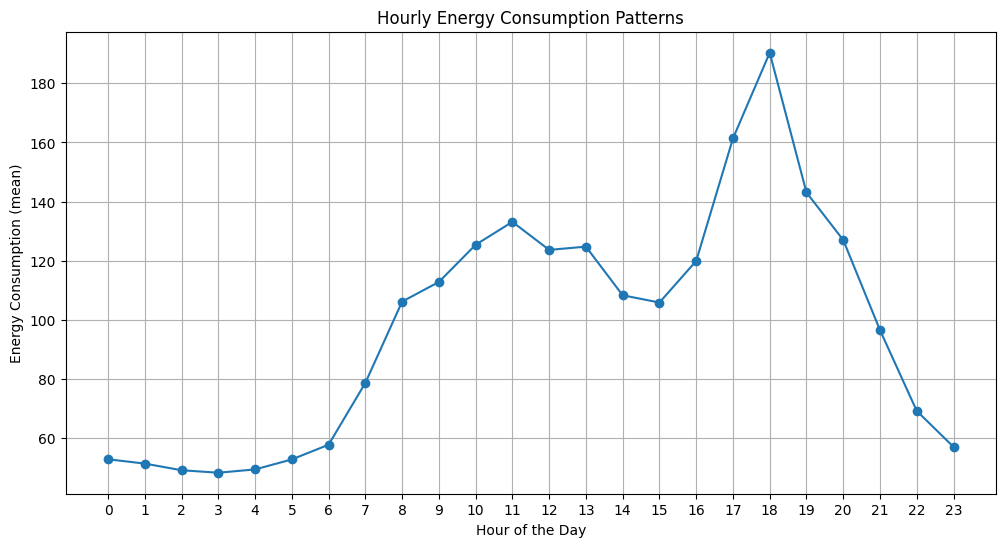

In [ ]:
hourly_energy = d3.groupby('hour')['Appliances'].mean()

plt.figure(figsize=(12, 6))
plt.plot(hourly_energy.index, hourly_energy.values, marker='o', linestyle='-')
plt.title('Hourly Energy Consumption Patterns')
plt.xlabel('Hour of the Day')
plt.ylabel('Energy Consumption (mean)')
plt.xticks(range(24))
plt.grid(True)
plt.show()

dari line chat yang telah dibuat kita dapat melihat distribusi pemakiaian variasai konsumsi energi yang ada. peak hournya ada oada jam 18.

In [ ]:
kolom_numerik3 = d3.select_dtypes(include=['number'])
kolom_kategorikal3 = d3.select_dtypes(include=['object'])

corr_matrix = kolom_numerik3.corr()

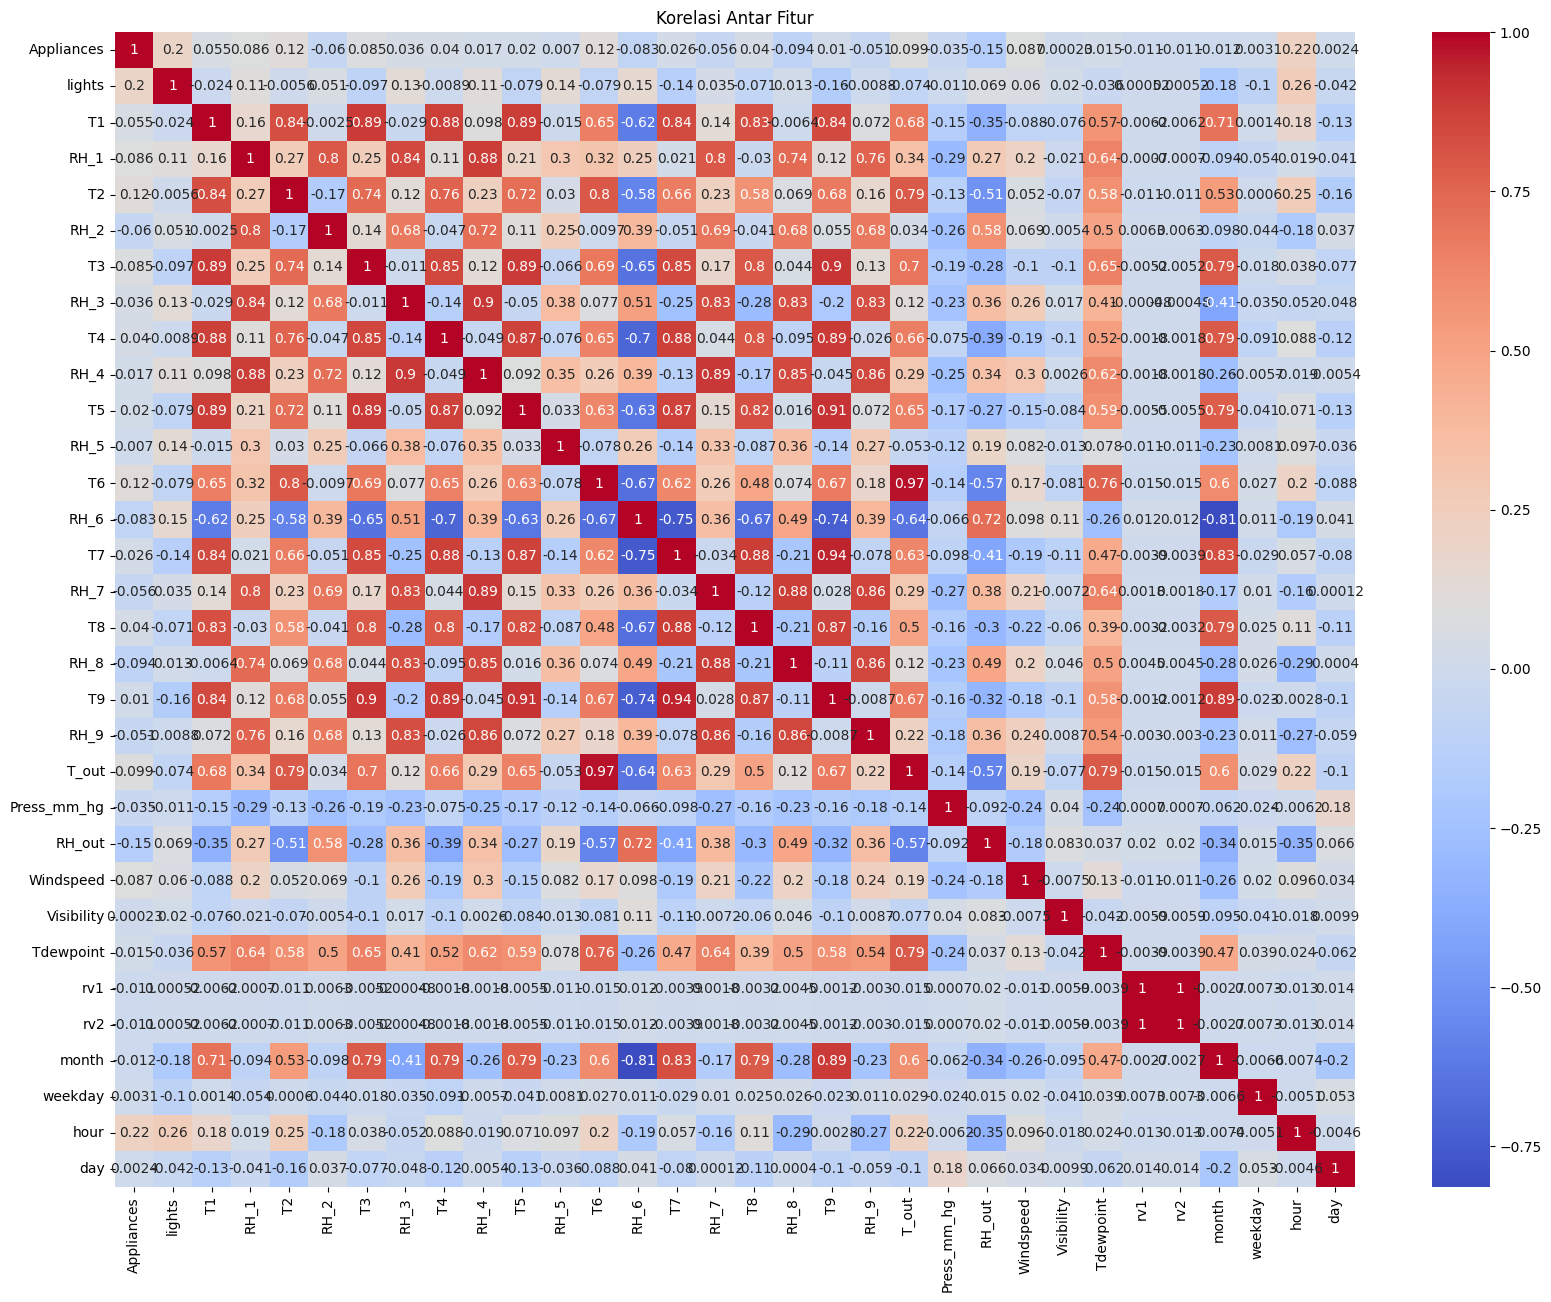

In [ ]:
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', annot_kws={"size": 10})  # Sesuaikan ukuran font
plt.title('Korelasi Antar Fitur')
plt.show()

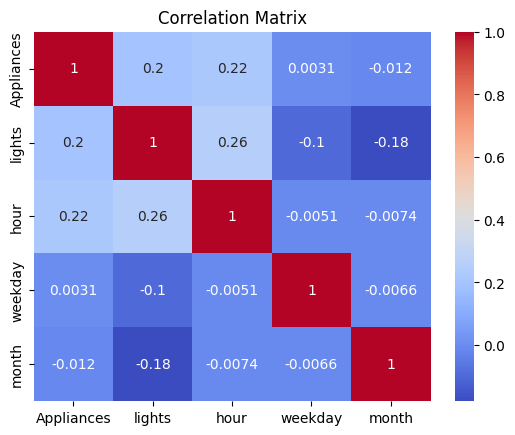

In [ ]:
sns.heatmap(d3[['Appliances', 'lights', 'hour', 'weekday','month']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Hour dan juga light memiliki korealsi yang positif lemah namun memiliki nilai yang lebih besar dibandingkan korelasi dengan variabel lainnya.